In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('medical_examination.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Overweight column

In [4]:
# Calculate BMI
df['BMI'] = df['weight'] / (df['height'] / 100) ** 2

# Determine if overweight
df['overweight'] = (df['BMI'] > 25).astype(int)

# Drop the BMI column as it's no longer needed
df.drop(columns=['BMI'], inplace=True)

Normalize data by making 0 always good and 1 always bad for cholesterol and gluc


In [5]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

Draw the Categorical Plot in the draw_cat_plot function

In [7]:
def draw_cat_plot():
    # create a DataFrame for the cat plot using pd.melt.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # group and reformat the data in df_cat to split it by cardio
    df_cat['total'] = 1
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()
    df_cat.rename(columns={'total': 'total_count'}, inplace=True)

    # convert the data into long format and create a chart that shows the value counts of the categorical features
    fig = sns.catplot(x='variable', y='total_count', hue='value', col='cardio', data=df_cat, kind='bar', height=5, aspect=1.2)

    # get the figure for the output and store it in the fig variable
    fig = fig
    
    return fig

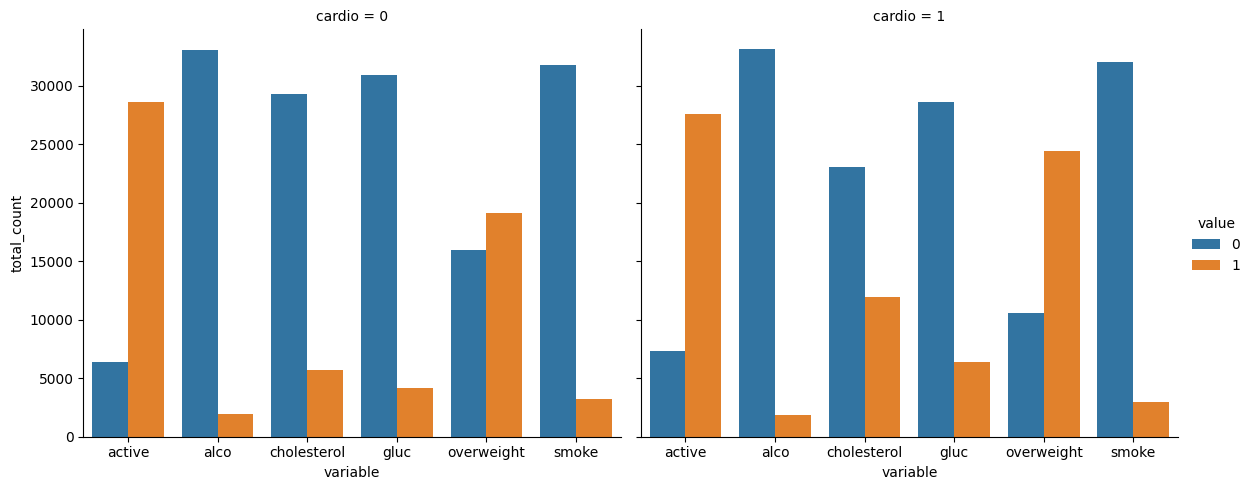

In [9]:
fig_cat = draw_cat_plot()
plt.show()

Draw the Heat Map in the draw_heat_map function

In [8]:
def draw_heat_map():
    # clean the data in the df_heat variable 
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # calculate the correlation matrix and store it in the corr variable
    corr = df_heat.corr()

    # generate a mask for the upper triangle and store it in the mask variable
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 10))

    # plot the correlation matrix 
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', center=0, cmap='coolwarm', square=True, linewidths=.5)

    return fig

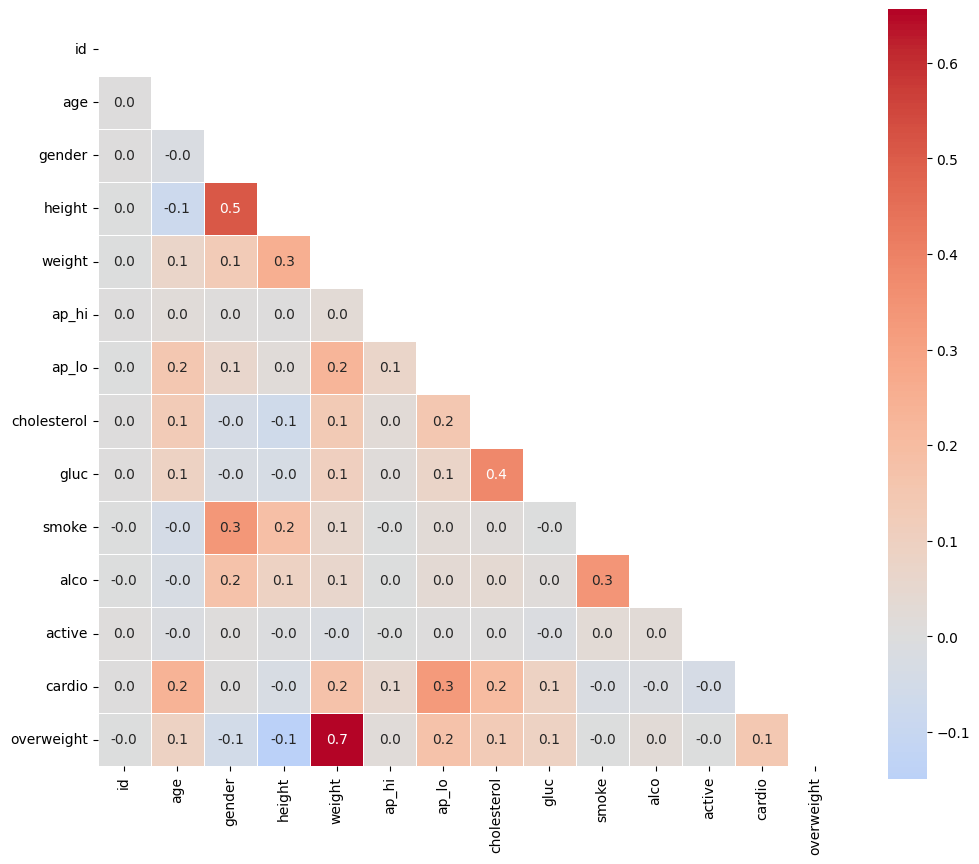

In [10]:
fig_heat = draw_heat_map()
plt.show()